In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

kaggle_username = os.environ.get("KAGGLE_USERNAME")
kaggle_key = os.environ.get("KAGGLE_KEY")


In [3]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from ARISA_DSML.preproc import get_raw_data
from ARISA_DSML.config import RAW_DATA_DIR, target

2025-06-06 21:53:18.168 | INFO     | ARISA_DSML.config:<module>:12 - PROJ_ROOT path is: /workspaces/Predict_cholesterol


In [4]:
import os

container_check = os.getenv("iscontainer")
if container_check == "y":
    # Set Kaggle credentials from Codespaces secrets (environment variables)
    kaggle_username = os.environ.get("KAGGLE_USERNAME")
    kaggle_key = os.environ.get("KAGGLE_KEY")
    if not kaggle_username or not kaggle_key:
        raise ValueError("KAGGLE_USERNAME and/or KAGGLE_KEY environment variables are not set.")

    os.environ["KAGGLE_USERNAME"] = kaggle_username
    os.environ["KAGGLE_KEY"] = kaggle_key


In [6]:
import os
from pathlib import Path
container_check = os.getenv("iscontainer")
if container_check=="y":
    config_dir = Path("/home/vscode/.config/kaggle")
    config_dir.mkdir(parents=True, exist_ok=True)

    with open(config_dir / "kaggle.json", "w") as dst:
        with open("../kaggle.json", "r") as src:
            dst.write(src.read())

FileNotFoundError: [Errno 2] No such file or directory: '../kaggle.json'

In [5]:
get_raw_data()
!dir "{RAW_DATA_DIR}"

2025-06-06 21:53:27.205 | INFO     | ARISA_DSML.preproc:get_raw_data:23 - Downloading data to: /workspaces/Predict_cholesterol/data/raw


Dataset URL: https://www.kaggle.com/datasets/joannborkowska/cholesterol-supplementation-classification


2025-06-06 21:53:27.776 | INFO     | ARISA_DSML.preproc:get_raw_data:33 - Dataset download and extraction completed successfully


test_cholesterol.xlsx  train_choloesterol.xlsx


In [6]:
from ARISA_DSML.preproc import preprocess_df

train_path = preprocess_df(RAW_DATA_DIR / "train_choloesterol.xlsx")

In [7]:
import pandas as pd
df_train = pd.read_csv(train_path)

In [8]:
y_train = df_train.pop(target)
X_train = df_train

In [10]:
import os
import mlflow

# Konfiguracja z zmiennych środowiskowych
server = os.environ["AZURE_DBSERVER"]
username = os.environ["AZURE_DBUSERNAME"]
password = os.environ["AZURE_DBUSERPASS"]
dbname = os.environ["AZURE_DBUSERNAME"]

# Zbuduj connection string
sql_uri = (
    f"mssql+pyodbc://{username}:{password}@{server}:1433/{dbname}"
    "?driver=ODBC+Driver+17+for+SQL+Server"
)

# Ustaw tracking URI
mlflow.set_tracking_uri(sql_uri)


In [ ]:
import mlflow

# Utwórz eksperyment
mlflow.set_experiment("test-notebook")

with mlflow.start_run():
    mlflow.log_param("test_param", 42)
    mlflow.log_metric("test_metric", 0.95)
    print("Dane zostały zapisane w Azure SQL i Azure Storage!")


2025/06/06 22:03:26 WARNING mlflow.store.db.utils: SQLAlchemy engine could not be created. The following exception is caught.
(pyodbc.ProgrammingError) ('42000', '[42000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Cannot open database "GithubUser" requested by the login. The login failed. (4060) (SQLDriverConnect)')
(Background on this error at: https://sqlalche.me/e/20/f405)
Operation will be retried in 0.1 seconds
2025/06/06 22:03:26 WARNING mlflow.store.db.utils: SQLAlchemy engine could not be created. The following exception is caught.
(pyodbc.ProgrammingError) ('42000', '[42000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Cannot open database "GithubUser" requested by the login. The login failed. (4060) (SQLDriverConnect)')
(Background on this error at: https://sqlalche.me/e/20/f405)
Operation will be retried in 0.3 seconds
2025/06/06 22:03:27 WARNING mlflow.store.db.utils: SQLAlchemy engine could not be created. The following exception is caught.
(pyodbc.Prog

In [19]:
from ARISA_DSML.train import run_hyperopt
import mlflow
mlflow.set_experiment("cholesterol_hyperparam_tuning")

best_params_path = run_hyperopt(X_train, y_train)

ImportError: libodbc.so.2: cannot open shared object file: No such file or directory

In [ ]:
%reload_ext autoreload

In [ ]:
import joblib
from ARISA_DSML.train import train_cv
params = joblib.load(best_params_path)
display(params)
n_folds = 5
cv_output_path = train_cv(X_train, y_train, params, n=n_folds)


{'depth': 5,
 'learning_rate': 0.2995567111497413,
 'iterations': 124,
 'l2_leaf_reg': 0.11084080958223169,
 'bagging_temperature': 0.9921093034173206,
 'random_strength': 0.19224056696382372}

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]
0:	learn: 0.9890110	test: 0.8000000	best: 0.8000000 (0)	total: 1.79ms	remaining: 220ms
1:	learn: 1.0000000	test: 0.8000000	best: 0.8000000 (0)	total: 3.15ms	remaining: 192ms
2:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (2)	total: 4.44ms	remaining: 179ms
3:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (2)	total: 5.86ms	remaining: 176ms
4:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (2)	total: 7.23ms	remaining: 172ms
5:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (2)	total: 8.57ms	remaining: 169ms
6:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (2)	total: 9.98ms	remaining: 167ms
7:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (2)	total: 11.1ms	remaining: 160ms
8:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (2)	total: 12.4ms	remaining: 159ms
9:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (2)	total: 13.8ms	remaining: 157ms
10:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (2)	total: 15.1ms	remaining: 156ms
11:	learn: 1.000000

In [ ]:
from ARISA_DSML.train import plot_error_scatter
cv_results = pd.read_csv(cv_output_path)
plot_error_scatter(
    df_plot=cv_results,
    name="Mean F1 Score",
    title="Cross-Validation (N=5) Mean F1 score with Error Bands",
    xtitle="Training Steps",
    ytitle="Performance Score",
    yaxis_range=[0.5, 1],
)

In [ ]:
plot_error_scatter(
    df_plot=cv_results,
    x="iterations",
    y="test-Logloss-mean",
    err="test-Logloss-std",
    name="Mean logloss",
    title="Cross-Validation (N=5) Mean Logloss with Error Bands",
    xtitle="Training Steps",
    ytitle="Logloss",
)

In [ ]:
from ARISA_DSML.train import train

model_path, model_params_path = train(X_train, y_train, params)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

2025-05-17 20:10:07.134 | WARNING  | ARISA_DSML.train:train:148 - cv_results is not a DataFrame. Skipping cv metrics and plots.


0:	learn: 0.9747899	total: 1.25ms	remaining: 154ms
50:	learn: 1.0000000	total: 31.4ms	remaining: 45ms
100:	learn: 1.0000000	total: 48.8ms	remaining: 11.1ms
123:	learn: 1.0000000	total: 67.6ms	remaining: 0us


/home/codespace/.python/current/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning:

Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.

Registered model 'cholesterol-pred-bclass' already exists. Creating a new version of this model...
2025/05/17 20:10:10 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name

🏃 View run delightful-sow-916 at: http://127.0.0.1:5000/#/experiments/927657685548945580/runs/7c13a907a5e14c4184eba86b2319b2d2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/927657685548945580


In [ ]:
dataset_test_path = RAW_DATA_DIR / "test_cholesterol.xlsx"
preprocced_test_path = preprocess_df(dataset_test_path)
df_test = pd.read_csv(preprocced_test_path)


{'depth': 5,
 'learning_rate': 0.2995567111497413,
 'iterations': 124,
 'l2_leaf_reg': 0.11084080958223169,
 'bagging_temperature': 0.9921093034173206,
 'random_strength': 0.19224056696382372,
 'eval_metric': 'F1',
 'loss_function': 'Logloss'}

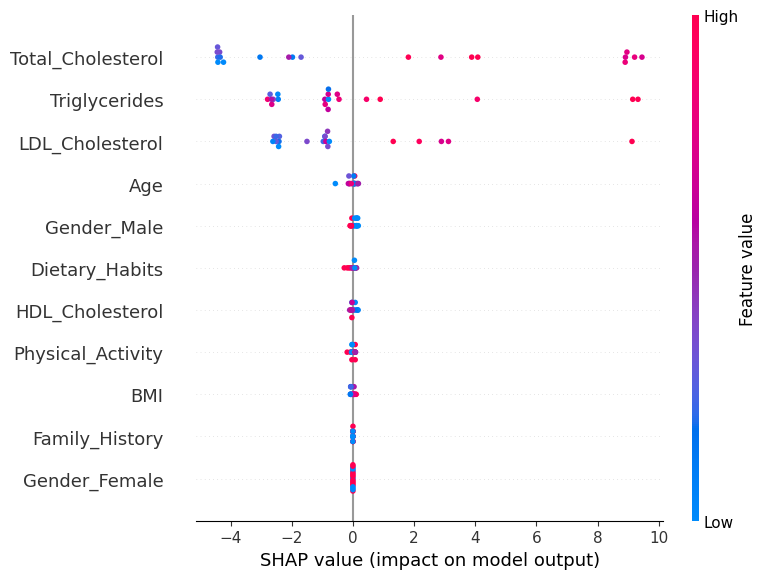

In [ ]:
from ARISA_DSML.predict import predict
from catboost import CatBoostClassifier

params = joblib.load(model_params_path)
display(params)
from_file = CatBoostClassifier()
model = from_file.load_model(str(model_path))
preds_path = predict(model, df_test, params)